In [8]:
import pandas as pd

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

import re

from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

In [4]:
def remove_t(my_str):
    # 대괄호([]), 쉼표(,), 작은 따옴표(')를 제거하는 정규 표현식을 적용하여 반환
    return re.sub('[\[\],\']', '', my_str)

In [22]:
font_path = 'AppleGothic'
cloud = WordCloud(font_path = font_path, background_color = 'white', width=800, height=800)

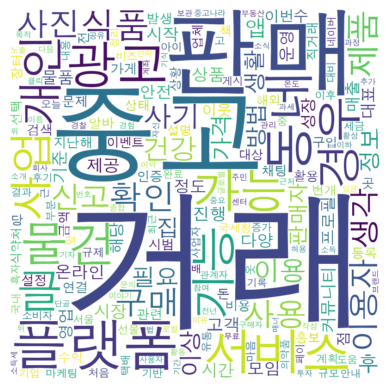

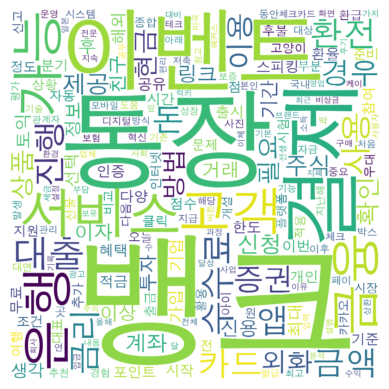

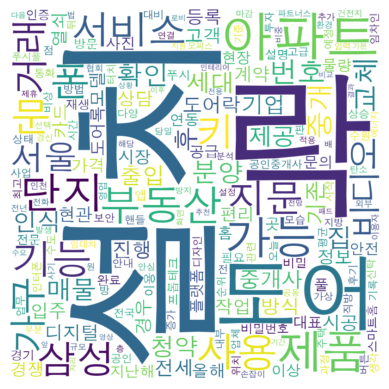

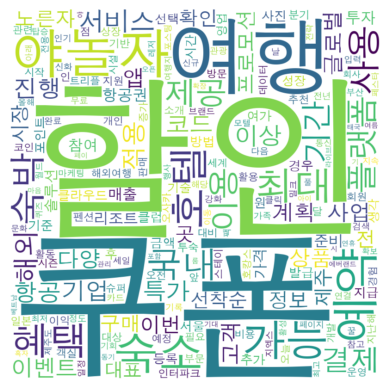

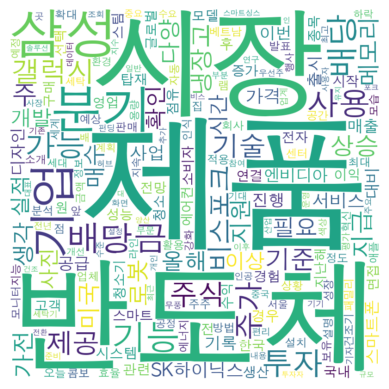

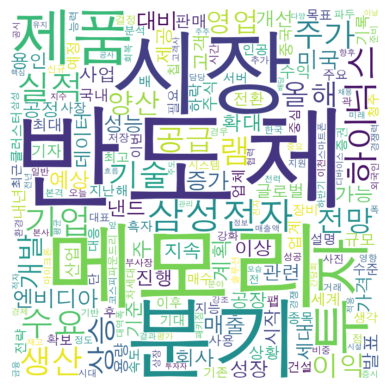

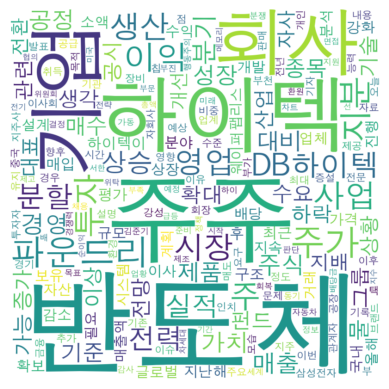

In [44]:
keywords = ['네이버', '카카오', '라인', '쿠팡', '배달의민족', '당근마켓', '토스', '직방', '야놀자', '삼성전자', 'SK하이닉스', 'DB하이텍']

for keyword in keywords:
    document1 = "" # 뉴스 문서를 저장할 변수 초기화
    file = f'{keyword}_뉴스_전처리.csv' # 뉴스 파일 경로 설정
    all_N = [] # 모든 명사를 저장할 리스트 초기화
    
    try: # CSV 파일 읽기 시도 (UTF-8 인코딩)
        df = pd.read_csv('csv_pre/'+file, encoding='utf-8')
    except UnicodeDecodeError:
        try: # CSV 파일 읽기 시도 (CP949 인코딩)
            df = pd.read_csv('csv_pre/'+file, encoding='cp949')
        except UnicodeDecodeError: # CSV 파일 읽기 시도 (EUC-KR 인코딩)
            df = pd.read_csv('csv_pre/'+file, encoding='euc-kr')
            
    all_N.extend(df['preprocessed_content']) # 뉴스 데이터의 모든 명사를 리스트에 추가
    document1 = ' '.join(all_N) # 뉴스 문서를 하나의 문자열로 결합
    document1 = remove_t(document1) # 대괄호와 쉼표 제거
    
    
    document2 = "" # 블로그 문서를 저장할 변수 초기화
    file = f'{keyword}_블로그_전처리.csv' # 블로그 파일 경로 설정
    all_N = [] # 모든 명사를 저장할 리스트 초기화
    
    try: # CSV 파일 읽기 시도 (UTF-8 인코딩)
        df = pd.read_csv('csv_pre/'+file, encoding='utf-8')
    except UnicodeDecodeError:
        try: # CSV 파일 읽기 시도 (CP949 인코딩)
            df = pd.read_csv('csv_pre/'+file, encoding='cp949')
        except UnicodeDecodeError: # CSV 파일 읽기 시도 (EUC-KR 인코딩)
            df = pd.read_csv('csv_pre/'+file, encoding='euc-kr')
            
    all_N.extend(df['preprocessed_content']) # 블로그 데이터의 모든 명사를 리스트에 추가

    document2 = ' '.join(all_N)  # 블로그 문서를 하나의 문자열로 결합
    document2 = remove_t(document2) # 대괄호와 쉼표 제거


    combined_document = document1 + " " + document2 # 뉴스와 블로그 문서를 결합
    word_counts = Counter(combined_document.split()) # 단어 빈도 계산

    for word in document1.split():  # 뉴스 문서의 단어 빈도를 추가로 계산하여 빈도를 증가시킴
        word_counts[word] += 1
        
    # 단어 빈도 정규화
    max_count = max(word_counts.values()) 
    normalized_counts = {word: count / max_count for word, count in word_counts.items()}

        
    wordcloud = cloud.generate_from_frequencies(word_counts) # 워드 클라우드 생성
    # 워드 클라우드 시각화
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()